In [135]:
import os
import sklearn
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

tf.random.set_seed(42)

data = '211102_Data'
dataname = data+'_23'
filename = 'myData/'+data+'.csv'
SD = pd.read_csv(filename)
SD=SD.iloc[:,:28]
SensorData = SD

In [136]:
SD

Sx00   Sx01   Sx02   Sx03   Sx04   Sx05   Sx06   Sx07   Sx08   Sx09  \
0       68.91  53.53  52.17  60.41  58.15  56.95  37.80  53.66  57.93  57.05   
1       72.39  50.49  49.50  58.63  59.09  55.21  35.90  53.66  57.93  57.96   
2       71.23  49.73  49.50  59.52  60.03  56.95  36.85  52.76  58.84  57.96   
3       70.07  52.01  50.39  60.41  56.27  54.34  37.80  54.56  58.84  57.05   
4       68.91  50.49  50.39  61.30  57.21  55.21  37.80  52.76  58.84  58.87   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
552960  68.91  51.25  49.50  57.74  57.21  56.95  34.95  57.26  61.57  57.05   
552961  70.07  55.81  53.06  58.63  60.97  53.47  34.00  56.36  62.48  57.96   
552962  67.75  54.29  51.28  59.52  60.03  56.95  38.75  59.06  59.75  56.14   
552963  68.91  53.53  51.28  60.41  58.15  54.34  34.95  59.06  60.66  57.05   
552964  68.91  55.05  53.06  59.52  55.33  57.82  32.10  55.46  59.75  56.14   

        ...   Sx12  Sx13   Sx14   Sx15   Sx16   Sx17    r  theta  theta_enc  \
0       ...  60.84  48.6  77.92  55.36  52.44  71.20  0.9      0       0.00   
1       ...  60.84  47.6  77.92  53.54  51.42  70.31  0.9      0       0.00   
2       ...  61.75  48.6  78.78  53.54  53.46  70.31  0.9      0       0.00   
3       ...  59.93  47.6  77.06  54.45  52.44  69.42  0.9      0       0.00   
4       ...  61.75  51.6  79.64  54.45  51.42  70.31  0.9      0       0.00   
...     ...    ...   ...    ...    ...    ...    ...  ...    ...        ...   
552960  ...  61.75  48.6  82.22  57.18  55.50  70.31  1.8    355     230.58   
552961  ...  61.75  46.6  79.64  58.09  54.48  66.75  1.8    355     230.58   
552962  ...  62.66  48.6  78.78  57.18  55.50  67.64  1.8    355     230.58   
552963  ...  61.75  46.6  79.64  55.36  51.42  68.53  1.8    355     230.58   
552964  ...  62.66  48.6  79.64  59.00  56.52  70.31  1.8    355     230.58   

          z  
0        10  
1        10  
2        10  
3        10  
4        10  
...     ...  
552960  151  
552961  151  
552962  151  
552963  151  
552964  151  

[552965 rows x 28 columns]

In [137]:
SDext =SD # SensorData[SensorData['z']==0]
mask = SDext["z"].isin([22])
SD = SDext[mask]
SD

Sx00   Sx01   Sx02   Sx03   Sx04   Sx05   Sx06   Sx07   Sx08   Sx09  \
46083  67.75  54.29  51.28  60.41  60.03  56.95  34.95  52.76  57.02  56.14   
46084  67.75  52.77  53.06  58.63  60.03  60.43  28.30  53.66  58.84  57.05   
46085  70.07  53.53  51.28  60.41  62.85  56.95  34.95  55.46  57.02  56.14   
46086  68.91  53.53  52.17  58.63  57.21  56.95  34.95  55.46  57.93  56.14   
46087  68.91  55.81  52.17  57.74  60.03  57.82  34.00  56.36  57.02  60.69   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
57598  68.91  50.49  50.39  57.74  57.21  55.21  34.95  55.46  55.20  56.14   
57599  70.07  51.25  49.50  59.52  58.15  59.56  39.70  55.46  55.20  57.05   
57600  72.39  53.53  50.39  57.74  56.27  56.95  40.65  55.46  56.11  57.96   
57601  70.07  53.53  50.39  58.63  58.15  56.95  38.75  54.56  55.20  57.96   
57602  70.07  50.49  49.50  58.63  59.09  56.95  40.65  52.76  57.02  57.05   

       ...   Sx12  Sx13   Sx14   Sx15   Sx16   Sx17    r  theta  theta_enc   z  
46083  ...  61.75  50.6  79.64  56.27  53.46  66.75  0.9      0      50.58  22  
46084  ...  60.84  47.6  78.78  55.36  48.36  67.64  0.9      0      50.58  22  
46085  ...  61.75  50.6  78.78  53.54  48.36  67.64  0.9      0      50.58  22  
46086  ...  64.48  46.6  78.78  55.36  52.44  67.64  0.9      0      50.58  22  
46087  ...  61.75  48.6  78.78  54.45  50.40  67.64  0.9      0      50.58  22  
...    ...    ...   ...    ...    ...    ...    ...  ...    ...        ...  ..  
57598  ...  61.75  46.6  80.50  54.45  51.42  66.75  1.8    355      49.92  22  
57599  ...  64.48  49.6  77.92  54.45  53.46  64.97  1.8    355      49.92  22  
57600  ...  63.57  48.6  79.64  54.45  52.44  66.75  1.8    355      49.92  22  
57601  ...  64.48  48.6  81.36  55.36  53.46  67.64  1.8    355      49.92  22  
57602  ...  61.75  46.6  78.78  52.63  49.38  65.86  1.8    355      49.92  22  

[11520 rows x 28 columns]

In [138]:
import numpy as np
toRad = np.pi/180 
SD['cos']=np.cos(SD.theta_enc*toRad)
SD['sin']=np.sin(SD.theta_enc*toRad)
SD['r'] = (SD['r']-SD['r'].mean())/(SD['r'].max()-SD['r'].min())*2
SD['theta_enc'] = (SD['theta_enc']-SD['theta_enc'].mean())/(SD['theta_enc'].max()-SD['theta_enc'].min())*2
SD['z'] = (SD['z']-SD['z'].mean())/(SD['z'].max()-SD['z'].min())*2

<ipython-input-138-d6db99d4985b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD['cos']=np.cos(SD.theta_enc*toRad)
<ipython-input-138-d6db99d4985b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD['sin']=np.sin(SD.theta_enc*toRad)
<ipython-input-138-d6db99d4985b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [139]:
SD

Sx00   Sx01   Sx02   Sx03   Sx04   Sx05   Sx06   Sx07   Sx08   Sx09  \
46083  67.75  54.29  51.28  60.41  60.03  56.95  34.95  52.76  57.02  56.14   
46084  67.75  52.77  53.06  58.63  60.03  60.43  28.30  53.66  58.84  57.05   
46085  70.07  53.53  51.28  60.41  62.85  56.95  34.95  55.46  57.02  56.14   
46086  68.91  53.53  52.17  58.63  57.21  56.95  34.95  55.46  57.93  56.14   
46087  68.91  55.81  52.17  57.74  60.03  57.82  34.00  56.36  57.02  60.69   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
57598  68.91  50.49  50.39  57.74  57.21  55.21  34.95  55.46  55.20  56.14   
57599  70.07  51.25  49.50  59.52  58.15  59.56  39.70  55.46  55.20  57.05   
57600  72.39  53.53  50.39  57.74  56.27  56.95  40.65  55.46  56.11  57.96   
57601  70.07  53.53  50.39  58.63  58.15  56.95  38.75  54.56  55.20  57.96   
57602  70.07  50.49  49.50  58.63  59.09  56.95  40.65  52.76  57.02  57.05   

       ...   Sx14   Sx15   Sx16   Sx17    r  theta  theta_enc   z       cos  \
46083  ...  79.64  56.27  53.46  66.75 -1.0      0  -0.714680 NaN  0.635000   
46084  ...  78.78  55.36  48.36  67.64 -1.0      0  -0.714680 NaN  0.635000   
46085  ...  78.78  53.54  48.36  67.64 -1.0      0  -0.714680 NaN  0.635000   
46086  ...  78.78  55.36  52.44  67.64 -1.0      0  -0.714680 NaN  0.635000   
46087  ...  78.78  54.45  50.40  67.64 -1.0      0  -0.714680 NaN  0.635000   
...    ...    ...    ...    ...    ...  ...    ...        ...  ..       ...   
57598  ...  80.50  54.45  51.42  66.75  1.0    355  -0.718399 NaN  0.643857   
57599  ...  77.92  54.45  53.46  64.97  1.0    355  -0.718399 NaN  0.643857   
57600  ...  79.64  54.45  52.44  66.75  1.0    355  -0.718399 NaN  0.643857   
57601  ...  81.36  55.36  53.46  67.64  1.0    355  -0.718399 NaN  0.643857   
57602  ...  78.78  52.63  49.38  65.86  1.0    355  -0.718399 NaN  0.643857   

            sin  
46083  0.772512  
46084  0.772512  
46085  0.772512  
46086  0.772512  
46087  0.772512  
...         ...  
57598  0.765146  
57599  0.765146  
57600  0.765146  
57601  0.765146  
57602  0.765146  

[11520 rows x 30 columns]

In [140]:
SD.describe()

Sx00          Sx01          Sx02          Sx03          Sx04  \
count  11520.000000  11520.000000  11520.000000  11520.000000  11520.000000   
mean      69.658562     52.536590     51.465262     59.299200     58.919299   
std        1.597950      1.428601      1.317973      1.530197      1.570551   
min       64.270000     46.690000     45.940000     53.290000     52.510000   
25%       68.910000     51.250000     50.390000     58.630000     58.150000   
50%       70.070000     52.770000     51.280000     59.520000     59.090000   
75%       71.230000     53.530000     52.170000     60.410000     60.030000   
max       75.870000     58.090000     56.620000     64.860000     64.730000   

               Sx05          Sx06          Sx07          Sx08          Sx09  \
count  11520.000000  11520.000000  11520.000000  11520.000000  11520.000000   
mean      56.963292     35.306415     53.911641     58.110894     56.415923   
std        1.208361      2.673654      1.443701      1.448281      1.349910   
min       53.470000     26.400000     49.160000     52.470000     50.680000   
25%       56.080000     33.050000     52.760000     57.020000     55.230000   
50%       56.950000     34.950000     53.660000     57.930000     56.140000   
75%       57.820000     36.850000     54.560000     58.840000     57.050000   
max       61.300000     45.400000     59.960000     63.390000     62.510000   

       ...          Sx14          Sx15          Sx16          Sx17  \
count  ...  11520.000000  11520.000000  11520.000000  11520.000000   
mean   ...     78.637563     54.645824     50.945859     69.053879   
std    ...      1.338470      1.431323      1.483545      1.475625   
min    ...     73.620000     48.080000     46.320000     63.190000   
25%    ...     77.920000     53.540000     50.400000     67.640000   
50%    ...     78.780000     54.450000     51.420000     69.420000   
75%    ...     79.640000     55.360000     51.420000     70.310000   
max    ...     83.940000     60.820000     55.500000     74.760000   

                  r         theta     theta_enc    z           cos  \
count  1.152000e+04  11520.000000  1.152000e+04  0.0  11520.000000   
mean   1.390885e-13    177.500000  7.316241e-14  NaN      0.020895   
std    7.453883e-01    103.917535  5.917416e-01  NaN      0.706750   
min   -1.000000e+00      0.000000 -9.732313e-01  NaN     -0.999433   
25%   -5.000000e-01     88.750000 -5.205122e-01  NaN     -0.675849   
50%    1.393885e-13    177.500000 -1.668018e-02  NaN      0.042129   
75%    5.000000e-01    266.250000  5.057346e-01  NaN      0.692380   
max    1.000000e+00    355.000000  1.026769e+00  NaN      0.999976   

                sin  
count  11520.000000  
mean       0.029572  
std        0.706597  
min       -0.999770  
25%       -0.667423  
50%        0.069751  
75%        0.754302  
max        0.999965  

[8 rows x 30 columns]

<AxesSubplot:>

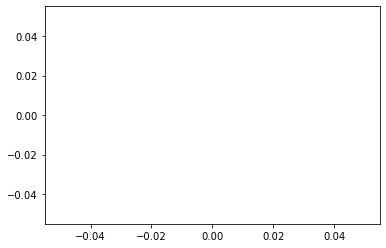

In [141]:
SDz=(SD.loc[:,'z'])
SDz.plot()

In [142]:
SDy = SD.iloc[:,24:30]
SDy.describe()

r         theta     theta_enc    z           cos  \
count  1.152000e+04  11520.000000  1.152000e+04  0.0  11520.000000   
mean   1.390885e-13    177.500000  7.316241e-14  NaN      0.020895   
std    7.453883e-01    103.917535  5.917416e-01  NaN      0.706750   
min   -1.000000e+00      0.000000 -9.732313e-01  NaN     -0.999433   
25%   -5.000000e-01     88.750000 -5.205122e-01  NaN     -0.675849   
50%    1.393885e-13    177.500000 -1.668018e-02  NaN      0.042129   
75%    5.000000e-01    266.250000  5.057346e-01  NaN      0.692380   
max    1.000000e+00    355.000000  1.026769e+00  NaN      0.999976   

                sin  
count  11520.000000  
mean       0.029572  
std        0.706597  
min       -0.999770  
25%       -0.667423  
50%        0.069751  
75%        0.754302  
max        0.999965

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
SD.hist(bins=30, figsize=(20,15))
plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/savefig/'+dataname+'_hist.png')
plt.show()

In [144]:
#for i in range(0,24):
#    SD.plot(kind="scatter", x= "theta_enc",y= "Sx"+format(i,'02X'),alpha = 0.1)    

In [145]:
X = SD.iloc[:,:24]
y = SD.iloc[:,[28,29]]

In [146]:
X

Sx00   Sx01   Sx02   Sx03   Sx04   Sx05   Sx06   Sx07   Sx08   Sx09  \
46083  67.75  54.29  51.28  60.41  60.03  56.95  34.95  52.76  57.02  56.14   
46084  67.75  52.77  53.06  58.63  60.03  60.43  28.30  53.66  58.84  57.05   
46085  70.07  53.53  51.28  60.41  62.85  56.95  34.95  55.46  57.02  56.14   
46086  68.91  53.53  52.17  58.63  57.21  56.95  34.95  55.46  57.93  56.14   
46087  68.91  55.81  52.17  57.74  60.03  57.82  34.00  56.36  57.02  60.69   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
57598  68.91  50.49  50.39  57.74  57.21  55.21  34.95  55.46  55.20  56.14   
57599  70.07  51.25  49.50  59.52  58.15  59.56  39.70  55.46  55.20  57.05   
57600  72.39  53.53  50.39  57.74  56.27  56.95  40.65  55.46  56.11  57.96   
57601  70.07  53.53  50.39  58.63  58.15  56.95  38.75  54.56  55.20  57.96   
57602  70.07  50.49  49.50  58.63  59.09  56.95  40.65  52.76  57.02  57.05   

       ...   Sx0E   Sx0F   Sx10   Sx11   Sx12  Sx13   Sx14   Sx15   Sx16  \
46083  ...  35.30  56.50  30.51  50.49  61.75  50.6  79.64  56.27  53.46   
46084  ...  34.46  57.39  30.51  50.49  60.84  47.6  78.78  55.36  48.36   
46085  ...  36.14  56.50  28.69  50.49  61.75  50.6  78.78  53.54  48.36   
46086  ...  34.46  56.50  30.51  51.36  64.48  46.6  78.78  55.36  52.44   
46087  ...  36.14  56.50  31.42  52.23  61.75  48.6  78.78  54.45  50.40   
...    ...    ...    ...    ...    ...    ...   ...    ...    ...    ...   
57598  ...  35.30  57.39  31.42  53.97  61.75  46.6  80.50  54.45  51.42   
57599  ...  34.46  55.61  28.69  53.10  64.48  49.6  77.92  54.45  53.46   
57600  ...  33.62  52.94  27.78  52.23  63.57  48.6  79.64  54.45  52.44   
57601  ...  32.78  55.61  26.87  49.62  64.48  48.6  81.36  55.36  53.46   
57602  ...  32.78  55.61  31.42  53.10  61.75  46.6  78.78  52.63  49.38   

        Sx17  
46083  66.75  
46084  67.64  
46085  67.64  
46086  67.64  
46087  67.64  
...      ...  
57598  66.75  
57599  64.97  
57600  66.75  
57601  67.64  
57602  65.86  

[11520 rows x 24 columns]

In [147]:
y.sample(5)

cos       sin
49182 -0.781194  0.624289
56210  0.985792  0.167973
48461 -0.446822  0.894623
51866 -0.652628 -0.757679
55326  0.933016 -0.359834

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.05, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2, random_state=42)

In [149]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  8755 ea 75 %    X_valid:  2189 ea 19 %    X_test:  576 ea 5 %


In [150]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [151]:
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_SS.pkl'
dump(scaler, file_name)

['myScaler/211102_Data_23_SS.pkl']

In [152]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(256, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(16, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(16, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(8, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(2))
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))


In [153]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 256)               6400      
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_39 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_40 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_41 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_42 (Dense)             (None, 32)               

## Callback (best, early stopping, tensorboard)

In [154]:
import os 
root_logdir = os.path.join(os.curdir, 'mylog/'+data)

def get_run_logdir():
    import time
    run_id= time.strftime("%m%d_%Hh%Mm%Ss"+dataname)
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [155]:
dataname

'211102_Data_23'

In [156]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

Epoch 1/100
274/274 [==============================] - 1s 3ms/step - loss: 0.4991 - val_loss: 0.4994
Epoch 2/100
274/274 [==============================] - 0s 2ms/step - loss: 0.4980 - val_loss: 0.4984
Epoch 3/100
274/274 [==============================] - 0s 2ms/step - loss: 0.4970 - val_loss: 0.4973
Epoch 4/100
274/274 [==============================] - 0s 2ms/step - loss: 0.4953 - val_loss: 0.4953
Epoch 5/100
274/274 [==============================] - 0s 2ms/step - loss: 0.4931 - val_loss: 0.4929
Epoch 6/100
274/274 [==============================] - 0s 2ms/step - loss: 0.4902 - val_loss: 0.4899
Epoch 7/100
274/274 [==============================] - 0s 1ms/step - loss: 0.4865 - val_loss: 0.4859
Epoch 8/100
274/274 [==============================] - 0s 1ms/step - loss: 0.4819 - val_loss: 0.4808
Epoch 9/100
274/274 [==============================] - 0s 1ms/step - loss: 0.4759 - val_loss: 0.4743
Epoch 10/100
274/274 [==============================] - 0s 1ms/step - loss: 0.4683 - val_lo

274/274 [==============================] - 0s 1ms/step - loss: 0.2549 - val_loss: 0.2801
Epoch 82/100
274/274 [==============================] - 0s 1ms/step - loss: 0.2538 - val_loss: 0.2797
Epoch 83/100
274/274 [==============================] - 0s 1ms/step - loss: 0.2526 - val_loss: 0.2797
Epoch 84/100
274/274 [==============================] - 0s 1ms/step - loss: 0.2516 - val_loss: 0.2792
Epoch 85/100
274/274 [==============================] - 0s 2ms/step - loss: 0.2504 - val_loss: 0.2785
Epoch 86/100
274/274 [==============================] - 0s 2ms/step - loss: 0.2493 - val_loss: 0.2781
Epoch 87/100
274/274 [==============================] - 0s 2ms/step - loss: 0.2485 - val_loss: 0.2779
Epoch 88/100
274/274 [==============================] - 0s 2ms/step - loss: 0.2475 - val_loss: 0.2786
Epoch 89/100
274/274 [==============================] - 0s 2ms/step - loss: 0.2465 - val_loss: 0.2783
Epoch 90/100
274/274 [==============================] - 0s 1ms/step - loss: 0.2456 - val_loss: 

In [23]:
%load_ext tensorboard
%tensorboard --logdir=./mylog/211102_Data --port=11031

Reusing TensorBoard on port 11031 (pid 3440), started 7:38:03 ago. (Use '!kill 3440' to kill it.)

In [157]:
model.save('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/myModel/'+dataname+'.h5')

In [158]:
model = tf.keras.models.load_model('myModel/'+dataname+'.h5')
scaler = load(file_name)
valid_predictions = model.predict(X_valid)

In [159]:
X_valid

array([[ 0.98361678,  1.22265652, -0.81634312, ...,  1.13293401,
         1.00125494,  0.84371534],
       [-0.46956663, -0.37025387, -0.14113443, ..., -2.04028157,
        -1.75188168, -0.96395115],
       [-0.46956663, -0.37025387,  0.53407427, ..., -1.40563846,
        -1.75188168, -0.36139565],
       ...,
       [ 0.25702507,  1.22265652,  1.20928296, ...,  0.4982909 ,
         1.00125494,  1.44627084],
       [ 0.25702507,  0.16071626, -0.14113443, ..., -0.77099534,
         0.31297079,  0.84371534],
       [ 0.25702507,  1.22265652,  1.20928296, ...,  1.13293401,
         0.31297079,  0.84371534]])

In [160]:
valid_predictions

array([[ 0.16544351, -0.74693143],
       [-0.5199972 ,  0.6119504 ],
       [ 0.08174067,  0.9106896 ],
       ...,
       [-0.36409113, -0.08810739],
       [ 0.29725987,  0.08001296],
       [-0.2374965 , -0.03581359]], dtype=float32)

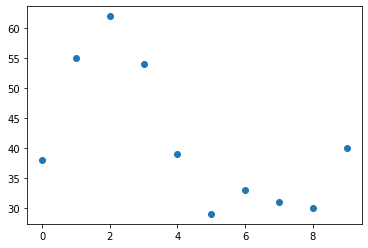

In [161]:
import time
arr = X_test
X_test0 = arr[:1]
X_test0
n = 10
a = np.zeros(n)
for i in range(0,n):
    Prev_time = time.time()
    test_predictions = model.predict(X_test0)
    cal_time = round((time.time()-Prev_time)*1000,2)
    a[i] = cal_time
b= range(0,n)
plt.scatter(b,a,alpha = 1)

In [162]:
X_test[0]

array([ 0.25702507,  2.28459679, -0.14113443,  0.15271015,  1.30397634,
        1.42760442,  0.57580738,  1.68669151,  1.13262173,  0.47091803,
        0.17215332, -0.09446953,  0.21306288,  0.70480058,  2.03820495,
       -1.05532658,  1.33784785, -2.63100524, -0.29720932,  0.89595375,
        0.75674101, -0.77099534, -1.75188168, -0.96395115])

In [163]:
arr = X_test
X_test0 = arr[:1]
X_test0

array([[ 0.25702507,  2.28459679, -0.14113443,  0.15271015,  1.30397634,
         1.42760442,  0.57580738,  1.68669151,  1.13262173,  0.47091803,
         0.17215332, -0.09446953,  0.21306288,  0.70480058,  2.03820495,
        -1.05532658,  1.33784785, -2.63100524, -0.29720932,  0.89595375,
         0.75674101, -0.77099534, -1.75188168, -0.96395115]])

In [164]:
valid_predictions_df=pd.DataFrame(valid_predictions)
#valid_predictions_df.columns = ["valid_theta","valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_r","valid_theta","valid_z"]
valid_predictions_df.columns = ["valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_theta","valid_z"]
#valid_predictions_df.columns = ["valid_z"]
#valid_predictions_df.columns = ["valid_theta"]


valid_predictions_df

valid_cos  valid_sin
0      0.165444  -0.746931
1     -0.519997   0.611950
2      0.081741   0.910690
3     -0.437089   0.121919
4      0.379650  -0.374508
...         ...        ...
2184  -0.063936   0.803560
2185  -0.149220  -0.853390
2186  -0.364091  -0.088107
2187   0.297260   0.080013
2188  -0.237496  -0.035814

[2189 rows x 2 columns]

In [165]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
#k_df.columns = ["theta_enc","z","cos","sin"]
#k_df.columns  = ["z","cos","sin"]
#k_df.columns = ["r","theta_enc","z"]
k_df.columns  = ["cos","sin"]
#k_df.columns  = ["theta_enc","z"]
#k_df.columns  = ["z"]
#k_df.columns  = ["theta_enc"]
k_df

cos       sin
0     0.614010 -0.789298
1    -0.781194  0.624289
2    -0.271944  0.962313
3    -0.921796  0.387676
4     0.210813 -0.977526
...        ...       ...
2184 -0.922133  0.386872
2185 -0.652628 -0.757679
2186 -0.999433 -0.033678
2187  0.210813 -0.977526
2188 -0.954916  0.296875

[2189 rows x 2 columns]

In [166]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
for i in range(0,2):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr

corr
55.28% cos
76.88% sin


cos       sin  valid_cos  valid_sin
cos        1.000000  0.025543   0.552831   0.175755
sin        0.025543  1.000000   0.172078   0.768837
valid_cos  0.552831  0.172078   1.000000   0.269980
valid_sin  0.175755  0.768837   0.269980   1.000000

In [167]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(ValidPre,figsize=(40,40))
#plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/savefig/210913_70ms_3ea_scatter.png')

<AxesSubplot:xlabel='valid_cos', ylabel='valid_sin'>

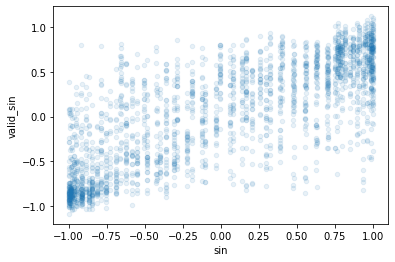

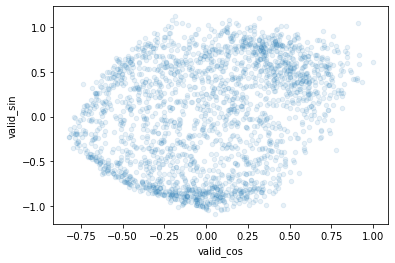

In [168]:
#ValidPre.plot(kind="scatter", x= "r",y= "valid_r",alpha = 0.1)
#ValidPre.plot(kind="scatter", x= "theta_enc",y= "valid_theta",alpha = 0.1)
#ValidPre.plot(kind="scatter", x= "z",y= "valid_z",alpha = 0.1)
ValidPre.plot(kind="scatter", x= "cos",y= "valid_cos",alpha = 0.1)
ValidPre.plot(kind="scatter", x= "sin",y= "valid_sin",alpha = 0.1)
ValidPre.plot(kind="scatter", x= "valid_cos",y= "valid_sin",alpha = 0.1)
#plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/savefig/210903_70ms_3ea_sin.png')